
# Modos de Crescimento

In [1]:

import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet 
from prophet.plot import add_changepoints_to_plot

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [2]:
df = pd.read_csv('../Modulo5/divvy_daily.csv')
df

,date,rides,temperature,weather
0,1/1/2014,95,19.483158,rain or snow
1,1/2/2014,111,16.833333,rain or snow
2,1/3/2014,6,-5.633333,clear
3,1/4/2014,181,30.007735,rain or snow
4,1/5/2014,32,16.756250,rain or snow
...,...,...,...,...
1453,12/27/2017,1117,2.458013,cloudy
1454,12/28/2017,1267,10.802762,rain or snow
1455,12/29/2017,1049,12.978932,cloudy
1456,12/30/2017,519,3.657033,cloudy


In [3]:

df = df[['date', 'rides']]
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

/tmp/ipykernel_17502/1351856710.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])


In [4]:
df

,ds,y
0,2014-01-01,95
1,2014-01-02,111
2,2014-01-03,6
3,2014-01-04,181
4,2014-01-05,32
...,...,...
1453,2017-12-27,1117
1454,2017-12-28,1267
1455,2017-12-29,1049
1456,2017-12-30,519





## Nesse curso, todos os modelos que treinamos utilizaram um modo de crescimento linear e ele atende a grande maioria dos casos. 
    
Mas, o prophet ainda suporta mais dois tipos de crescimento: o <b>Flat e o Logistics</b>. 


É muito interessante saber como eles funcionam, ppois há alguns casos onde um modelo de crescimento linear pode projetar algo que está um pouco fora da realidade. 

E para distinguir isso, é importante ter um conhecimento de domínio sobre a série temporal para determinar o que faz e o que não faz sentido para uma projeção daqueles dados. 


Complementando a visão que temos sobre o crescimento linear, vou trazer aqui como podemos visualizar o crescimento linear diretamente no nosso gráfico de previsão. Por isso vou introduzir a função add_changepoints_to_plot, que está dentro do pacote plot do prophet. 


### Vamos instanciar um modelo com os parâmetros padrões que já utilizamos anteriormente. Repare que estamos especificando o modo de crescimento linear, mas por padrão o Prophet já entende que você não especificar nenhum valor diferente,o padrão á é linear. 

Porém, foi introduzido para trazer clareza na análise.

In [6]:
model = Prophet(growth='linear',seasonality_mode='multiplicative',yearly_seasonality=4)


In [7]:
# fit

In [8]:

model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

16:34:49 - cmdstanpy - INFO - Chain [1] start processing
16:34:49 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2014-01-01,3624.191625,-126.905451,3708.579568,3624.191625,3624.191625,-0.520406,-0.520406,-0.520406,0.132233,0.132233,0.132233,-0.652639,-0.652639,-0.652639,0.0,0.0,0.0,1738.141962
1,2014-01-02,3628.752860,-126.007962,3646.697036,3628.752860,3628.752860,-0.526077,-0.526077,-0.526077,0.127486,0.127486,0.127486,-0.653564,-0.653564,-0.653564,0.0,0.0,0.0,1719.747877
2,2014-01-03,3633.314095,-249.090963,3453.606733,3633.314095,3633.314095,-0.577595,-0.577595,-0.577595,0.076547,0.076547,0.076547,-0.654142,-0.654142,-0.654142,0.0,0.0,0.0,1534.731233
3,2014-01-04,3637.875329,-1872.591573,2063.688207,3637.875329,3637.875329,-0.938860,-0.938860,-0.938860,-0.284479,-0.284479,-0.284479,-0.654381,-0.654381,-0.654381,0.0,0.0,0.0,222.419192
4,2014-01-05,3642.436564,-1888.573664,1892.168585,3642.436564,3642.436564,-0.979183,-0.979183,-0.979183,-0.324890,-0.324890,-0.324890,-0.654293,-0.654293,-0.654293,0.0,0.0,0.0,75.825446


In [11]:
# plotando o ajuste + a previsão

/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/fabiene/anaconda3/envs/Udemy/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


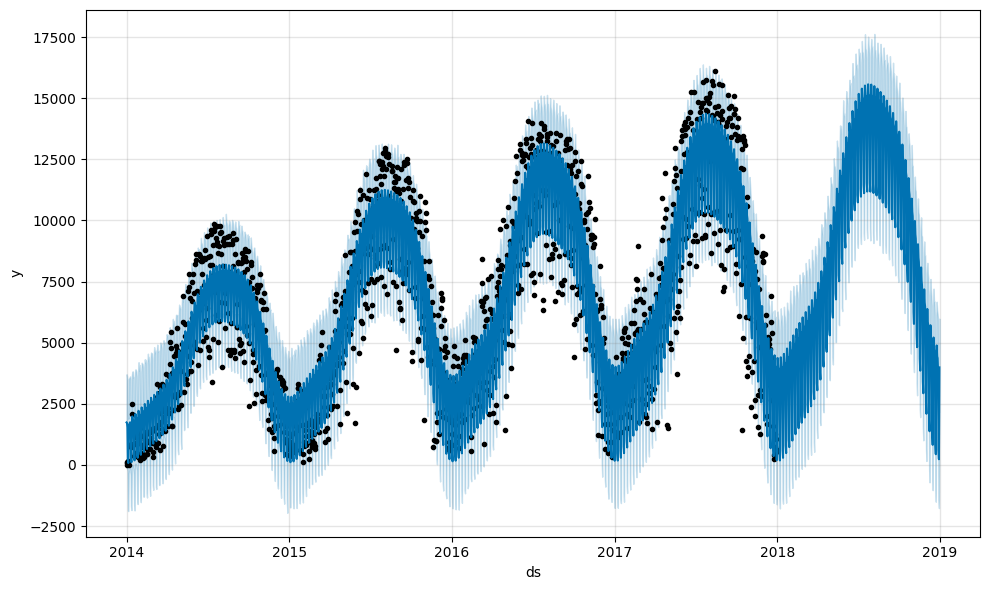

In [10]:
fig = model.plot(forecast)


In [12]:

add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()



- otimizar a função add.changepoints_to_plot, a gente passa o fig.gca() que desejamos incluir os Change Points, que também terá a nossa curva de crescimento. Fazemos isso, pegando o objeto da figura do plot do modelo e acionando o método plot do modelo e acionando o método gca,  que seria Get Current Axis fig.gca().

- Passando o modelo e o forecast

# chamando agora a figura novamente

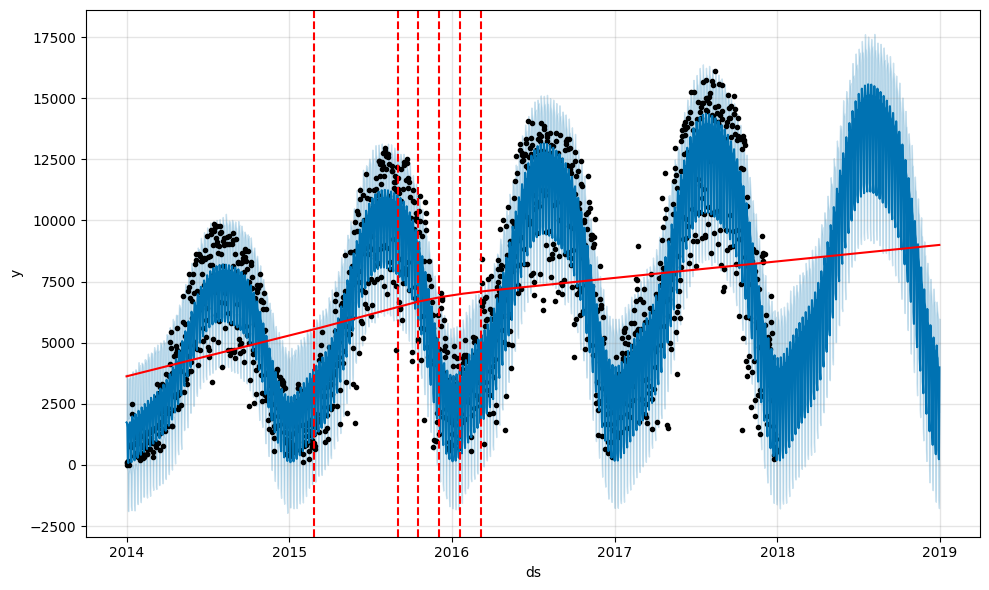

In [14]:
fig


Há duas informações, uma delas que é a linha de crescimento do nosso modelo. Nós podemos ver aqui é uma linha completamente reta, entre o final de 2015 e início de 2016 houve uma mudança na inclinação desse crescimento que a nossa série estava tendo. 

As linhas tracejadas verticalmente não há necessidade de ter tanta preocupação agora. Pois, vamos ver mais para frente a sua importãncia e seu significado.



## Acima está o crescimento linear e sua visualização